In [2]:
import pandas as pd
df = pd.read_csv(r'E:\Y3 S1(Year3)\IRWA\Walmart_customer_final_10000.csv')

In [3]:
df.columns

Index(['Product_ID', 'Product_Name', 'Brand', 'Model', 'Category',
       'Market_Price', 'Purchase_Amount', 'Discount_Applied', 'Rating',
       'Feedback', 'Customer_ID', 'Age', 'Gender', 'City', 'Purchase_Date',
       'Payment_Method', 'Repeat_Customer', 'Competitor_Name',
       'Competitor_Model', 'Competitor_Price', 'Competitor_Rating',
       'Promotion_Competitor', 'Market_Share', 'Competitor_Feedback'],
      dtype='object')

In [4]:
df.columns = df.columns.str.strip()

columns_to_keep = ['Rating', 'Gender', 'Age', 'Repeat_Customer','Brand','Feedback']
df = df[columns_to_keep]

print(df.columns)

Index(['Rating', 'Gender', 'Age', 'Repeat_Customer', 'Brand', 'Feedback'], dtype='object')


C:\Users\CNN COMPUTERS\AppData\Local\Temp\ipykernel_6892\2747289689.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparison_df = df.groupby(['Age_Group', 'Brand_Group']).size().unstack(fill_value=0)


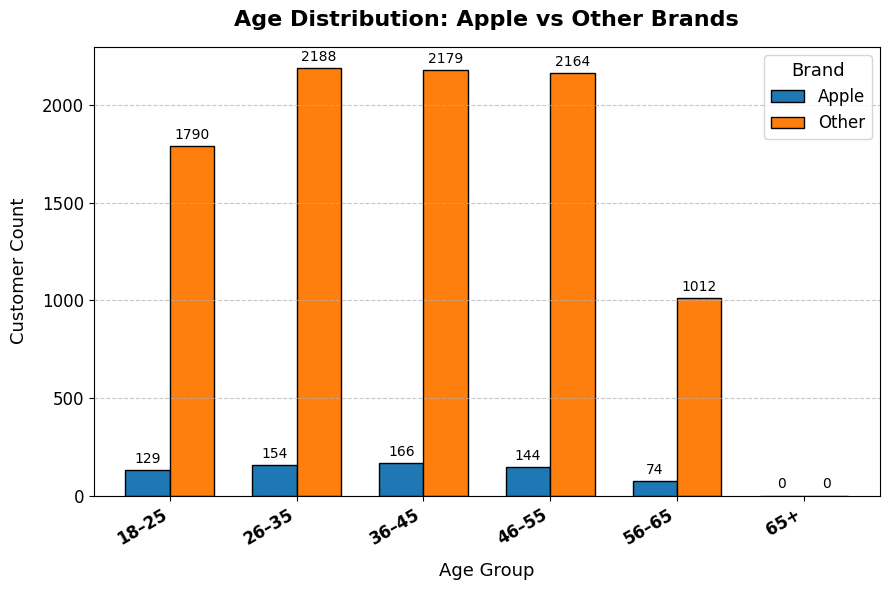

In [5]:
import matplotlib.pyplot as plt

# --- Step 1: Bin ages into groups and create comparison_df ---
age_bins = [17, 25, 35, 45, 55, 65, 120]
age_labels = ["18–25", "26–35", "36–45", "46–55", "56–65", "65+"]

df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# Create Apple vs Other column
df['Brand_Group'] = df['Brand'].apply(lambda x: 'Apple' if x.strip().lower() == 'apple' else 'Other')

# Group and pivot for plotting
comparison_df = df.groupby(['Age_Group', 'Brand_Group']).size().unstack(fill_value=0)

# --- Step 2: Plot grouped bar chart ---
ax = comparison_df.plot(
    kind='bar',
    figsize=(9,6),
    color=["#1f77b4", "#ff7f0e"],   # Blue = Apple, Orange = Others
    edgecolor="black",
    width=0.7
)

# Titles & labels
plt.title("Age Distribution: Apple vs Other Brands", fontsize=16, pad=15, weight="bold")
plt.xlabel("Age Group", fontsize=13, labelpad=10)
plt.ylabel("Customer Count", fontsize=13, labelpad=10)

# --- Step 3: Beautify axis labels ---
plt.xticks(rotation=30, ha="right", fontsize=12, weight="bold")  # Clear x-axis labels
plt.yticks(fontsize=12)

# Grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Legend
plt.legend(title="Brand", fontsize=12, title_fontsize=13)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

plt.tight_layout()
plt.show()


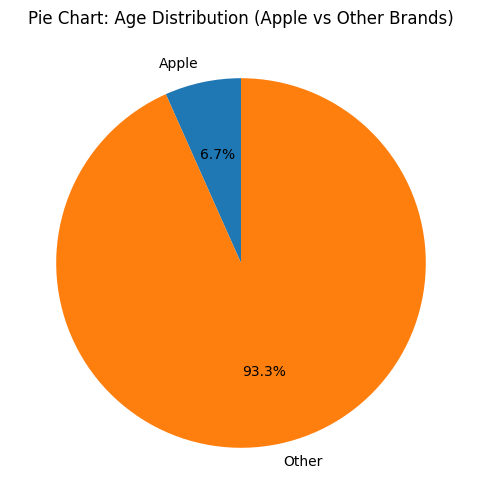

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Pie Chart ---
# Flatten Apple vs Other counts into total proportions
brand_totals = comparison_df.sum()

plt.figure(figsize=(6,6))
brand_totals.plot(
    kind="pie",
    autopct='%1.1f%%',
    startangle=90,
    colors=["#1f77b4", "#ff7f0e"]  # Blue = Apple, Orange = Other
)
plt.title("Pie Chart: Age Distribution (Apple vs Other Brands)")
plt.ylabel("")
plt.show()

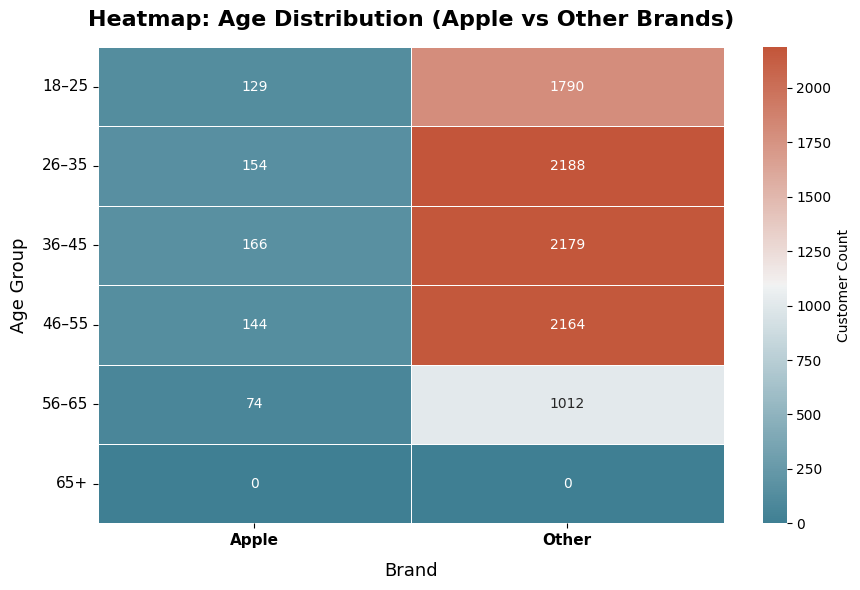

In [7]:
# --- Rename columns if they look like one-hot encoded ---
# Example: rename "Age_20-30" instead of "Age_20_30"
comparison_df = comparison_df.rename(columns=lambda x: x.replace("_", "-") if "Age" in x else x)
comparison_df.index = [col.replace("_", "-") for col in comparison_df.index]

plt.figure(figsize=(9,6))

sns.heatmap(
    comparison_df,
    annot=True,
    fmt="d",
    cmap=sns.diverging_palette(220, 20, as_cmap=True),  # Blue ↔ Orange
    annot_kws={"size": 10},  # smaller annotation font
    linewidths=0.7,
    linecolor="white",
    cbar_kws={'label': 'Customer Count'}
)

plt.title("Heatmap: Age Distribution (Apple vs Other Brands)", fontsize=16, pad=15, weight="bold")
plt.xlabel("Brand", fontsize=13, labelpad=10)
plt.ylabel("Age Group", fontsize=13, labelpad=10)

# Ticks styling
plt.xticks(rotation=0, fontsize=11, weight="bold")
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()


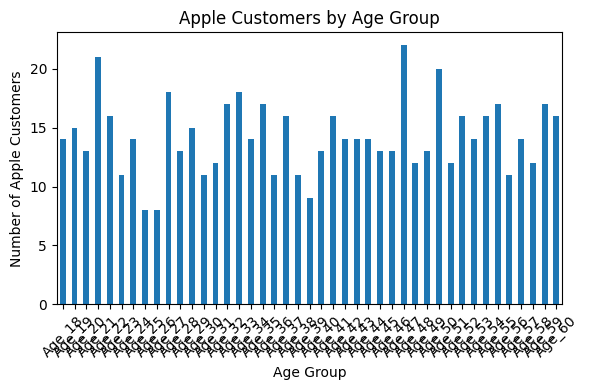

In [8]:
# --- One-hot encode Age ---
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\CNN COMPUTERS\OneDrive\Desktop\Rlab1\Walmart_customer_feedback_reduced (1).csv')
df_encoded = pd.get_dummies(df, columns=['Age'])

# --- Filter Apple customers only ---
apple_df = df_encoded[df_encoded['Brand'] == 'Apple']

# --- Count age groups ---
apple_age_counts = apple_df[[col for col in df_encoded.columns if col.startswith('Age_')]].sum()

# --- Plot bar chart ---
plt.figure(figsize=(6,4))
apple_age_counts.plot(kind='bar')
plt.title("Apple Customers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Apple Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


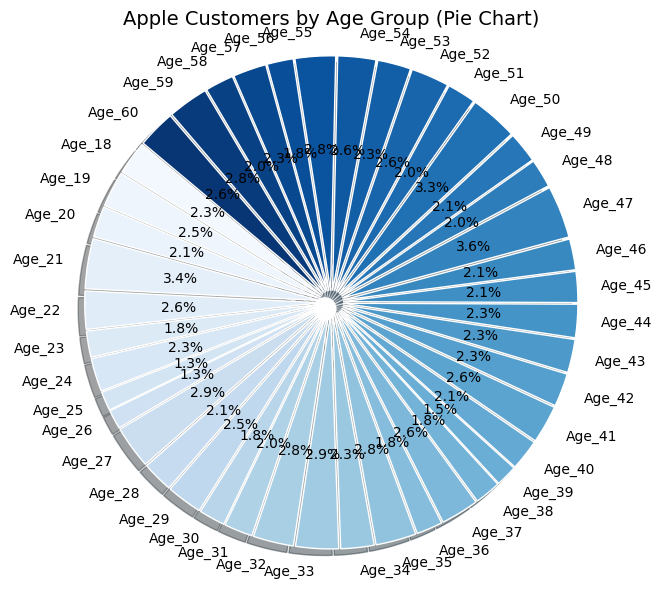

In [9]:
# Number of age groups
n = len(apple_age_counts)

# Use a single color palette with n shades
colors = sns.color_palette("Blues", n_colors=n)

# Optional: explode all slices slightly for clarity
explode = [0.05]*n

plt.figure(figsize=(7,7))
plt.pie(
    apple_age_counts,
    labels=apple_age_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor':'white'}
)
plt.title("Apple Customers by Age Group (Pie Chart)", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()


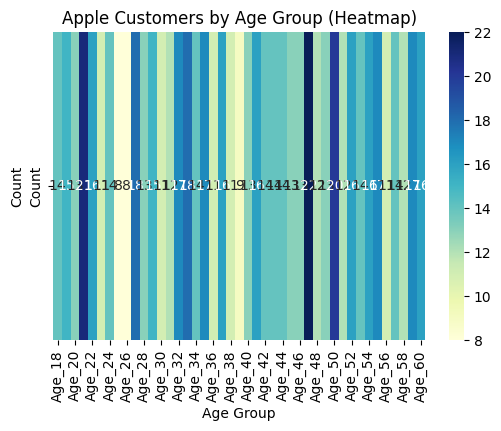

In [10]:
# --- Heatmap ---
# Heatmap requires a DataFrame, so we convert the Series to DataFrame
age_df = apple_age_counts.to_frame(name='Count')

plt.figure(figsize=(6,4))
sns.heatmap(age_df.T, annot=True, cmap="YlGnBu", cbar=True, fmt='d')
plt.title("Apple Customers by Age Group (Heatmap)")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [11]:
file_path = r"E:\Y3 S1(Year3)\IRWA\Walmart_customer_final_10000.csv"
df = pd.read_csv(file_path)

In [12]:
# ==========================================
# Feedback Sentiment + Campaign Analysis
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline


C:\Users\CNN COMPUTERS\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
#sentiment Analysis (BERT) 
sentiment_pipeline = pipeline("sentiment-analysis")
df['Sentiment'] = df['Feedback'].astype(str).apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])
df['Confidence'] = df['Feedback'].astype(str).apply(lambda x: sentiment_pipeline(x[:512])[0]['score'])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [14]:
# Group by Repeat_Customer and Sentiment
sentiment_repeat_ct = pd.crosstab(df['Repeat_Customer'], df['Sentiment'])

print("🔎 Cross-tab of Repeat_Customer vs Sentiment:\n")
print(sentiment_repeat_ct)


🔎 Cross-tab of Repeat_Customer vs Sentiment:

Sentiment        NEGATIVE  POSITIVE
Repeat_Customer                    
No                   3574      1555
Yes                  3356      1515


<Figure size 600x400 with 0 Axes>

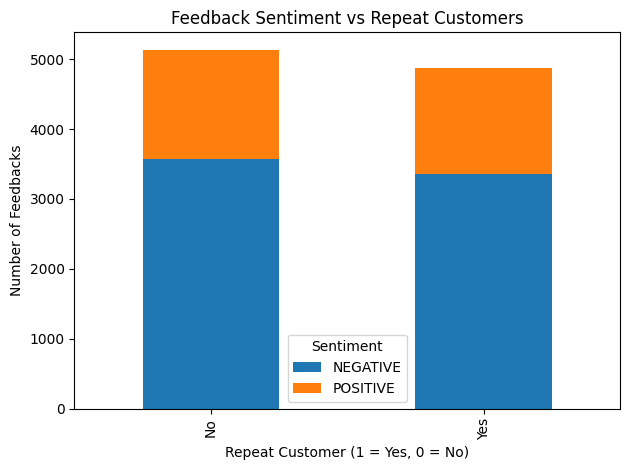

In [15]:
#  Feature Analysis Graphs ----

# Feedback (Sentiment) vs Repeat_Customer
if 'Sentiment' in df.columns:
	plt.figure(figsize=(6,4))
	df.groupby(['Repeat_Customer', 'Sentiment']).size().unstack().plot(kind='bar', stacked=True)
	plt.title("Feedback Sentiment vs Repeat Customers")
	plt.xlabel("Repeat Customer (1 = Yes, 0 = No)")
	plt.ylabel("Number of Feedbacks")
	plt.legend(title="Sentiment")
	plt.tight_layout()
	plt.show()
else:
	print("⚠️ 'Sentiment' column not found in df. Available columns are:", list(df.columns))

<Figure size 600x600 with 0 Axes>

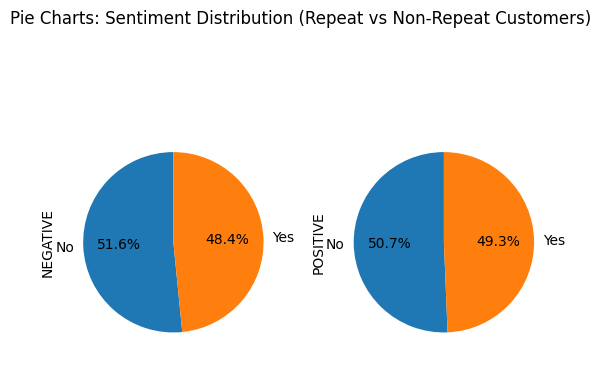

In [16]:
# --- Pie Chart ---
# Create cross-tab of Sentiment vs Repeat_Customer
sentiment_repeat_ct = pd.crosstab(df['Repeat_Customer'], df['Sentiment'])

plt.figure(figsize=(6,6))
sentiment_repeat_ct.plot(
    kind="pie",
    subplots=True,
    autopct='%1.1f%%',
    startangle=90,
    legend=False,
    colors=["#1f77b4", "#ff7f0e"]  # Blue & Orange
)
plt.suptitle("Pie Charts: Sentiment Distribution (Repeat vs Non-Repeat Customers)")
plt.show()


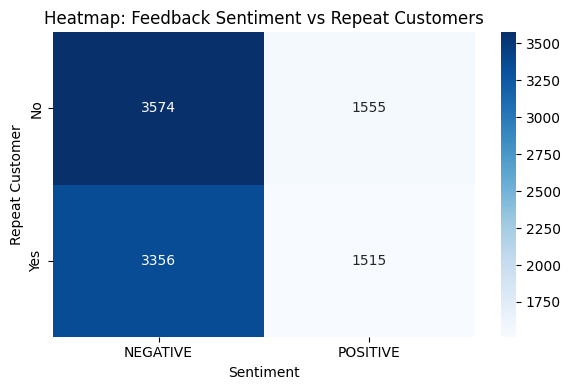

In [17]:
import seaborn as sns

# -- Heatmap ---
plt.figure(figsize=(6,4))
sns.heatmap(sentiment_repeat_ct, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap: Feedback Sentiment vs Repeat Customers")
plt.xlabel("Sentiment")
plt.ylabel("Repeat Customer")
plt.tight_layout()
plt.show()

In [18]:
campaign_suggestions = []


In [19]:
negative_df = df[df['Sentiment'].str.lower() == 'negative']
age_repeat_negatives = negative_df.groupby(['Age', 'Repeat_Customer']).size().reset_index(name='Neg_Count')


In [20]:
for _, row in age_repeat_negatives.iterrows():
    if row['Neg_Count'] > 5 and row['Repeat_Customer'] == 1:  # threshold example
        suggestion = f"Offer loyalty discount to Age {row['Age']} repeat customers"
        campaign_suggestions.append(suggestion)


In [21]:
# Re-create negative feedback DataFrame and brand_model_issues
negative_df = df[df['Sentiment'].str.lower() == 'negative']
brand_model_issues = negative_df[['Brand', 'Model', 'Feedback']]

# Aggregate negative feedback counts per Brand/Model
brand_model_counts = brand_model_issues.groupby(['Brand', 'Model']).size().reset_index(name='Negative_Count')

# Generate campaign suggestions for top 5 Brand/Model with most negative feedbacks
for _, row in brand_model_counts.sort_values('Negative_Count', ascending=False).head(5).iterrows():
    suggestion = f"Target campaign for {row['Brand']} {row['Model']} ({row['Negative_Count']} negative feedbacks)"
    campaign_suggestions.append(suggestion)


In [22]:
# Ensure correct DataFrame is loaded
df = pd.read_csv(r"C:\Users\CNN COMPUTERS\OneDrive\Desktop\Rlab1\sentiment_feedback_results.csv")

# Filter negative feedback data first
negative_df = df[df['Sentiment'] == 'Negative']

# Group by Age and Repeat_Customer to count negatives
age_repeat_negatives = negative_df.groupby(['Age', 'Repeat_Customer']).size().reset_index(name='Neg_Count')

# Define campaign_targets (example: filter where Neg_Count > 2)
campaign_targets = age_repeat_negatives[age_repeat_negatives['Neg_Count'] > 2]

# Debugging prints
print("🔎 Checking negative_df shape:", negative_df.shape)
print("🔎 Checking age_repeat_negatives shape:", age_repeat_negatives.shape)
print("🔎 Checking campaign_targets shape:", campaign_targets.shape)

print("\n--- Age + Repeat Customer Negatives ---")
print(age_repeat_negatives.head(10))

print("\n--- Campaign Targets ---")
print(campaign_targets.head(10))


🔎 Checking negative_df shape: (0, 26)
🔎 Checking age_repeat_negatives shape: (0, 3)
🔎 Checking campaign_targets shape: (0, 3)

--- Age + Repeat Customer Negatives ---
Empty DataFrame
Columns: [Age, Repeat_Customer, Neg_Count]
Index: []

--- Campaign Targets ---
Empty DataFrame
Columns: [Age, Repeat_Customer, Neg_Count]
Index: []


In [23]:
if 'campaign_suggestions' not in locals():
    campaign_suggestions = []

print("\n📢 AI Campaign Suggestions:\n")
if len(campaign_suggestions) == 0:
    print("⚠️ No campaign suggestions found. (Check thresholds or data)")
else:
    for s in campaign_suggestions:
        print("-", s)



📢 AI Campaign Suggestions:

- Target campaign for Whirlpool Whirlpool LED Bulb 9W (62 negative feedbacks)
- Target campaign for Puma Puma Classics Dress (53 negative feedbacks)
- Target campaign for Levi's Levi's Denim Dress (46 negative feedbacks)
- Target campaign for Dove Dove DermaSeries Cream (43 negative feedbacks)
- Target campaign for L'Oreal Color Riche Matte (42 negative feedbacks)


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
#Prepare data
# Convert Repeat_Customer and Discount_Applied to categorical (Yes/No)
df['Repeat_Customer'] = df['Repeat_Customer'].astype(str)
df['Discount_Applied'] = df['Discount_Applied'].astype(str)

In [26]:
# Cross-tab between Repeat Customer and Discount Applied
repeat_discount_ct = pd.crosstab(df['Repeat_Customer'], df['Discount_Applied'])
print("🔎 Cross-tab analysis (Repeat_Customer vs Discount_Applied):\n")
print(repeat_discount_ct)

🔎 Cross-tab analysis (Repeat_Customer vs Discount_Applied):

Discount_Applied    No   Yes
Repeat_Customer             
No                2459  2530
Yes               2523  2488


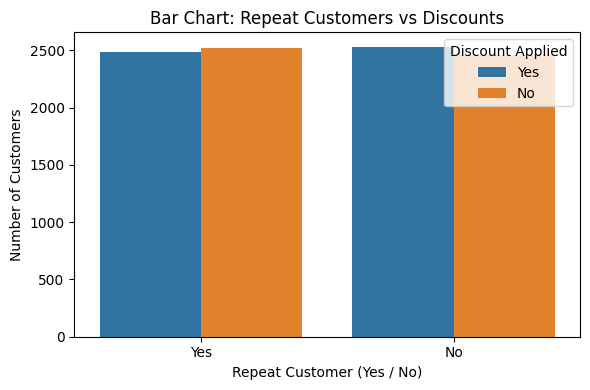

In [27]:
# =========================================
# Visualization Part
# =========================================

# 1. Bar Chart
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Repeat_Customer", hue="Discount_Applied")
plt.title("Bar Chart: Repeat Customers vs Discounts")
plt.xlabel("Repeat Customer (Yes / No)")
plt.ylabel("Number of Customers")
plt.legend(title="Discount Applied")
plt.tight_layout()
plt.show()

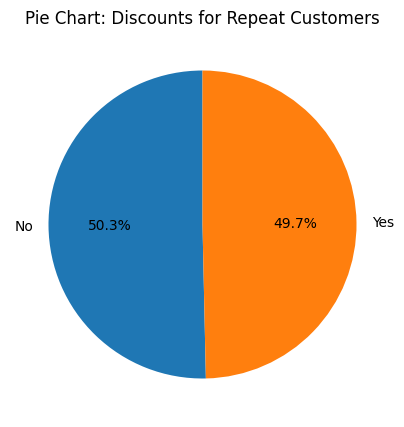

In [28]:
# 2. Pie Chart (only repeat customers)
repeat_customers = df[df['Repeat_Customer'].str.lower() == "yes"]
discount_counts = repeat_customers['Discount_Applied'].value_counts()

plt.figure(figsize=(5,5))
discount_counts.plot(
    kind="pie", 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=["#1f77b4", "#ff7f0e"]  
)
plt.title("Pie Chart: Discounts for Repeat Customers")
plt.ylabel("")
plt.show()


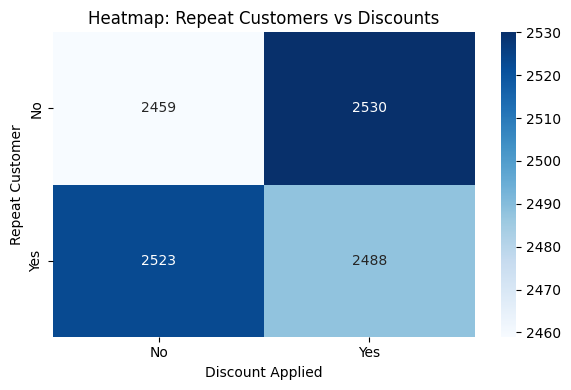

In [29]:
# 3. Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(repeat_discount_ct, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap: Repeat Customers vs Discounts")
plt.xlabel("Discount Applied")
plt.ylabel("Repeat Customer")
plt.tight_layout()
plt.show()

In [30]:
# ---Targeted Campaign Segments ---
# Target: repeat customers with negative feedback → priority retention
target_retention = df[(df['Repeat_Customer']=='Yes') & (df['Feedback']=='Negative')]

# Target: young customers for specific brands
target_young_brand = df[(df['Age'].isin(['18-25','26-35'])) & (df['Brand']=='Apple')]

# Target: customers not using discounts → encourage discount campaigns
target_no_discount = df[(df['Repeat_Customer']=='Yes') & (df['Discount_Applied']=='No')]

# Show summary counts
print("📌 Target Retention Segment (Repeat + Negative Feedback):", target_retention.shape[0])
print("📌 Target Young Customers for Apple:", target_young_brand.shape[0])
print("📌 Target Repeat Customers not using Discounts:", target_no_discount.shape[0])


📌 Target Retention Segment (Repeat + Negative Feedback): 0
📌 Target Young Customers for Apple: 0
📌 Target Repeat Customers not using Discounts: 2523


In [31]:
# ================================
#API Campaign Suggestions
# Sentiment Analysis on Feedback
# ================================

import pandas as pd
from transformers import pipeline

# Load dataset
file_path = r"E:\Y3 S1(Year3)\IRWA\Walmart_customer_final_10000.csv"
df = pd.read_csv(file_path)

# Load pre-trained sentiment analysis pipeline (BERT-based)
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply sentiment analysis to the Feedback column
df['Sentiment'] = df['Feedback'].astype(str).apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])
df['Confidence'] = df['Feedback'].astype(str).apply(lambda x: sentiment_pipeline(x[:512])[0]['score'])

# Show first few results
print(df[['Feedback', 'Sentiment', 'Confidence']].head())

# Save results to a new CSV
output_path = r"E:\Y3 S1(Year3)\IRWA\sentiment_feedback_results_new.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Sentiment analysis completed. Results saved to: {output_path}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


                     Feedback Sentiment  Confidence
0             Packaging issue  NEGATIVE    0.991019
1  Value for money (positive)  POSITIVE    0.999813
2             Durable product  POSITIVE    0.999830
3             Heating problem  NEGATIVE    0.996171
4               Slow delivery  NEGATIVE    0.999711

✅ Sentiment analysis completed. Results saved to: E:\Y3 S1(Year3)\IRWA\sentiment_feedback_results_new.csv


In [32]:
df = pd.read_csv(r"E:\Y3 S1(Year3)\IRWA\sentiment_feedback_results.csv")

In [33]:
df.head()

,Product_ID,Product_Name,Brand,Model,Category,Market_Price,Purchase_Amount,Discount_Applied,Rating,Feedback,...,Repeat_Customer,Competitor_Name,Competitor_Model,Competitor_Price,Competitor_Rating,Promotion_Competitor,Market_Share,Competitor_Feedback,Sentiment,Confidence
0,PRD33554,Dress,Nike,Nike Tech Fleece Dress,Electronics,327.24,262.23,Yes,4.1,Packaging issue,...,Yes,Zara,Satin Slip Dress,60,3.4,Yes,30,Damaged item,NEGATIVE,0.991019
1,PRD09428,Sofa Cover,Panasonic,CozyFit Sofa Cover,Electronics,221.87,208.55,No,4.6,Low quality,...,No,SureFit,Deluxe Sofa Slipcover,50,3.2,No,30,Damaged item,NEGATIVE,0.999771
2,PRD00200,Perfume,Nivea,Fresh Natural Deodorant,Beauty,226.07,192.60,Yes,4.2,Packaging issue,...,Yes,MarketBrand,Perfume Pro Series,50,3.4,Yes,30,Damaged item,NEGATIVE,0.991019
3,PRD12448,Smartphone,LG,LG Note Plus 12,Electronics,236.15,212.21,Yes,4.4,Value for money (positive),...,No,Xiaomi,Redmi Note 12,50,4.0,No,10,Durable product,POSITIVE,0.999813
4,PRD39490,Lamp,Philips,Hue Go Portable Lamp,Electronics,124.68,111.64,Yes,3.7,Value for money (positive),...,No,Mi,Bedside Lamp 2,70,3.8,No,10,Satisfied customer,POSITIVE,0.999813


In [34]:
print(df.columns)

Index(['Product_ID', 'Product_Name', 'Brand', 'Model', 'Category',
       'Market_Price', 'Purchase_Amount', 'Discount_Applied', 'Rating',
       'Feedback', 'Customer_ID', 'Age', 'Gender', 'City', 'Purchase_Date',
       'Payment_Method', 'Repeat_Customer', 'Competitor_Name',
       'Competitor_Model', 'Competitor_Price', 'Competitor_Rating',
       'Promotion_Competitor', 'Market_Share', 'Competitor_Feedback',
       'Sentiment', 'Confidence'],
      dtype='object')


In [35]:
# ================================
# Filter Negative Feedback
# ================================

import pandas as pd

# Load dataset
file_path = r"E:\Y3 S1(Year3)\IRWA\sentiment_feedback_results.csv"
df = pd.read_csv(file_path)

# Filter only negative feedback rows
negative_df = df[df['Sentiment'].str.lower() == 'negative']

# Select only Brand and Model columns
brand_model_issues = negative_df[['Brand', 'Model', 'Feedback']]

# Show the first few rows
print("\n🔎 Negative Feedback Related to Brand & Model:\n")
print(brand_model_issues.head(20))

# Save results to new CSV (for campaign planning)
output_path = r"E:\Y3 S1(Year3)\IRWA\negative_feedback_brand_model.csv"
brand_model_issues.to_csv(output_path, index=False)
print(f"\n✅ Negative feedback extracted. Saved to: {output_path}")



🔎 Negative Feedback Related to Brand & Model:

        Brand                            Model             Feedback
0        Nike           Nike Tech Fleece Dress      Packaging issue
1   Panasonic               CozyFit Sofa Cover          Low quality
2       Nivea          Fresh Natural Deodorant      Packaging issue
6   Whirlpool    Whirlpool Thermal Curtain Set      Heating problem
8       Apple                        iPhone 14        Slow delivery
9   Whirlpool            Whirlpool LED Bulb 9W        Slow delivery
10    L'Oreal                Color Riche Shine        Slow delivery
11    L'Oreal          Age Perfect Night Cream      Usability issue
13    Philips          Daily Collection Kettle      Packaging issue
14      Nivea              Anti-Dandruff Power        Slow delivery
15       Dove      Dove Velvet Liquid Lipcolor  Battery drains fast
17    Philips                SHP LED Desk Lamp          Low quality
18       Puma              Puma Classics Dress      Usability issue


In [50]:
import os
import time
import math
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# ------- CONFIG -------
#Uses Hugging Face API for sentiment classification.
# API CALL: Hugging Face Inference API
DATA_PATH = r"E:\Y3 S1(Year3)\IRWA\Walmart_customer_final_10000.csv"   # path to your CSV
BOTTOM_N = 8                                     # how many least-engaged products to target
HF_API_URL = "https://api-inference.huggingface.co/models/distilbert-base-uncased-finetuned-sst-2-english"
HF_API_KEY = os.getenv("HF_API_KEY")             # optional: set this in your env to use HF Inference API
MAX_HF_CALLS = 300                               # safety cap for calls if using HF


In [51]:
# Load dataset
df = pd.read_csv(DATA_PATH)

# Detect product column name (common names in your files)
if "Product_Name" in df.columns:
    PROD_COL = "Product_Name"
elif "Product" in df.columns:
    PROD_COL = "Product"
elif "Product_ID" in df.columns:
    PROD_COL = "Product_ID"
else:
    raise KeyError("No product column found. Expected Product_Name / Product / Product_ID")

# Normalize Discount_Applied to Yes/No
if "Discount_Applied" not in df.columns:
    df["Discount_Applied"] = "No"
df["Discount_Applied"] = (
    df["Discount_Applied"].astype(str).str.strip().str.lower()
    .map({"yes": "Yes", "y":"Yes", "true":"Yes", "1":"Yes",
          "no":"No", "n":"No", "false":"No", "0":"No"})
    .fillna("No")
)

# Ensure Purchase_Amount exists (revenue proxy)
if "Purchase_Amount" not in df.columns:
    df["Purchase_Amount"] = 0.0

# Clean Repeat_Customer if exists
if "Repeat_Customer" in df.columns:
    df["Repeat_Customer"] = df["Repeat_Customer"].astype(str).str.strip().str.lower().map(
        {"yes":"Yes","y":"Yes","1":"Yes","true":"Yes","no":"No","n":"No","0":"No","false":"No"}
    ).fillna("No")


In [52]:
# Helper fallback: rating -> sentiment
def derive_sentiment_from_rating(r):
    try:
        r = float(r)
    except Exception:
        return "Neutral"
    if r >= 4.0:
        return "Positive"
    if r <= 2.0:
        return "Negative"
    return "Neutral"

# Try to import local transformers pipeline
_local_pipeline = None
try:
    from transformers import pipeline
    _local_pipeline = pipeline("sentiment-analysis")
    print("Local transformers pipeline ready.")
except Exception:
    _local_pipeline = None
    print("Local transformers not available; will use API fallback or rating rule.")

# HF Inference API caller (single-text safe)
def hf_predict_single(text):
    if not HF_API_KEY:
        return None
    headers = {"Authorization": f"Bearer {HF_API_KEY}"}
    try:
        r = requests.post(HF_API_URL, headers=headers, json={"inputs": text[:512]}, timeout=20)
        if r.status_code == 200:
            js = r.json()
            # Robust parsing
            if isinstance(js, list) and len(js) > 0:
                obj = js[0]
                if isinstance(obj, dict) and "label" in obj:
                    lab = obj["label"]
                elif isinstance(obj, list) and len(obj) > 0 and isinstance(obj[0], dict):
                    lab = obj[0].get("label", "NEUTRAL")
                else:
                    lab = "NEUTRAL"
            elif isinstance(js, dict) and "label" in js:
                lab = js["label"]
            else:
                lab = "NEUTRAL"
            return "Positive" if "POS" in lab.upper() else "Negative"
        else:
            return None
    except Exception:
        return None

# Main analyze function (takes list of texts; returns list of sentiments)
def analyze_sentiments(texts):
    """
    texts: list of str
    returns: list of "Positive"/"Negative"/"Neutral"
    Strategy:
      1) If HF_API_KEY available -> call HF single predictions (capped)
      2) Else if local transformers available -> call pipeline in batch
      3) Else -> fallback to rating rule (should be rare)
    """
    out = []
    # 1) If HF key present, try using it (cap calls)
    if HF_API_KEY:
        count = 0
        for t in texts:
            if count >= MAX_HF_CALLS:
                out.append(None); continue
            pred = hf_predict_single(t)
            out.append(pred)
            count += 1
            time.sleep(0.12)  # be polite
        # If some are None, we'll fill them later with local or fallback
    # 2) If local pipeline available and we still have None slots or no HF used:
    if _local_pipeline:
        # we will run on any entries that are None or if no HF used
        needs_local = [i for i, v in enumerate(out) if v is None] if out else list(range(len(texts)))
        if out and needs_local:
            batch_texts = [texts[i] for i in needs_local]
            try:
                preds = _local_pipeline(batch_texts)
                for idx, pred in zip(needs_local, preds):
                    lab = pred.get("label","NEUTRAL") if isinstance(pred, dict) else "NEUTRAL"
                    out[idx] = "Positive" if "POS" in lab.upper() else "Negative"
            except Exception:
                # leave them None; fallback later
                pass
        elif not out:  # no HF, use local for all
            try:
                preds = _local_pipeline(texts)
                out = ["Positive" if ("POS" in p.get("label","NEUTRAL").upper()) else "Negative" for p in preds]
            except Exception:
                out = [None]*len(texts)
    # 3) Fill remaining None with Neutral or rating-fallback (we'll use Neutral)
    final = []
    for i, val in enumerate(out if out else [None]*len(texts)):
        if val is None:
            final.append("Neutral")
        else:
            final.append(val)
    return final


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Device set to use cpu


Local transformers pipeline ready.


In [53]:
# If Sentiment column missing or empty, fill it
if "Sentiment" not in df.columns:
    df["Sentiment"] = None

# Which rows need sentiment from feedback text?
need_idx = df[df["Sentiment"].isna() & df["Feedback"].notna()].index
texts = df.loc[need_idx, "Feedback"].astype(str).tolist()

# Analyze in chunks (avoids memory spikes)
CHUNK = 200
for i in range(0, len(texts), CHUNK):
    chunk_texts = texts[i:i+CHUNK]
    preds = analyze_sentiments(chunk_texts)
    # write back
    for j, pred in enumerate(preds):
        idx = need_idx[i+j]
        if pred is not None:
            df.at[idx, "Sentiment"] = pred

# Any remaining missing sentiment -> derive from Rating if present, else Neutral
if "Rating" in df.columns:
    mask = df["Sentiment"].isna()
    df.loc[mask, "Sentiment"] = df.loc[mask, "Rating"].apply(derive_sentiment_from_rating)
else:
    df["Sentiment"] = df["Sentiment"].fillna("Neutral")


In [ ]:
#Fetch upcoming holidays (no-key API, optional but useful)
#Uses Nager.Date API to fetch holidays.
#API CALL: Nager.Date Public Holiday API
def get_upcoming_holidays(country="US", lookahead_days=60):
    today = datetime.utcnow().date()
    url = f"https://date.nager.at/api/v3/PublicHolidays/{today.year}/{country}"
    try:
        r = requests.get(url, timeout=15)
        r.raise_for_status()
        data = r.json()
        cutoff = today + timedelta(days=lookahead_days)
        upcoming = []
        for h in data:
            d = datetime.fromisoformat(h["date"]).date()
            if today <= d <= cutoff:
                upcoming.append({"date": str(d), "name": h.get("localName") or h.get("name")})
        return upcoming
    except Exception:
        return []

upcoming_holidays = get_upcoming_holidays(country="US", lookahead_days=60)


C:\Users\CNN COMPUTERS\AppData\Local\Temp\ipykernel_6892\2352573451.py:3: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  today = datetime.utcnow().date()


In [54]:
#Compute least-engaged products (proxy) and summaries
# Proxy #1: number of feedback rows per product (transactions proxy)
txn_counts = df.groupby(PROD_COL).size().rename("Transactions")

# Proxy #2: revenue proxy (sum of Purchase_Amount)
rev_sum = df.groupby(PROD_COL)["Purchase_Amount"].sum().rename("Revenue")

# Combined summary, sorted ascending so bottom are least engaged
summary = pd.concat([txn_counts, rev_sum], axis=1).sort_values(["Transactions","Revenue"], ascending=[True, True])

# Choose least BOTTOM_N products
least = summary.head(BOTTOM_N).copy()
least_products = least.index.tolist()

# Sentiment and discount breakdown for the least products
sent_ct = (
    df[df[PROD_COL].isin(least_products)]
    .groupby([PROD_COL, "Sentiment"])
    .size().unstack(fill_value=0)
    .reindex(columns=["Negative","Neutral","Positive"], fill_value=0)
)

disc_ct = (
    df[df[PROD_COL].isin(least_products)]
    .groupby([PROD_COL, "Discount_Applied"])
    .size().unstack(fill_value=0)
    .reindex(columns=["No","Yes"], fill_value=0)
)

# Show quick summary
print("Least-engaged products (transactions, revenue):")
print(least)


Least-engaged products (transactions, revenue):
              Transactions    Revenue
Product_Name                         
Smartwatch             533  143310.29
Curtains               581  152192.40
Cookware               595  165428.88
Jacket                 603  158144.38
Perfume                603  158211.83
Lipstick               611  166087.56
Jeans                  623  162451.11
Sofa Cover             623  173192.68


In [62]:
#Campaign planning logic (function + CampaignAgent)
def plan_for_product(product):
    s = sent_ct.loc[product] if product in sent_ct.index else pd.Series({"Negative":0,"Neutral":0,"Positive":0})
    d = disc_ct.loc[product] if product in disc_ct.index else pd.Series({"No":0,"Yes":0})
    neg, neu, pos = int(s.get("Negative",0)), int(s.get("Neutral",0)), int(s.get("Positive",0))
    no_disc, yes_disc = int(d.get("No",0)), int(d.get("Yes",0))
    total = max(1, neg + neu + pos)

    actions = []

    # Core recommendation
    if neg > pos and neg >= 1:
        actions.append("Quality & service improvements: investigate negative reviews, fix issues, run service-recovery outreach.")
    elif neu >= max(pos, neg):
        actions.append("Awareness & education: feature videos, UGC, targeted ads explaining benefits.")
    else:
        actions.append("Amplify social proof: surface positive reviews in ads, testimonials, retargeting.")

    # Discount & promotion recommendation
    if no_disc >= yes_disc:
        actions.append("Introduce limited-time discounts or bundles for this product; test A/B at 10-20% off.")
    else:
        actions.append("Optimize discount targeting & creative; test lower discount depth combined with free-shipping.")

    # Timing with holidays if available
    if upcoming_holidays:
        next_h = upcoming_holidays[0]
        actions.append(f"Plan campaign creatives timed to {next_h['name']} on {next_h['date']}.")

    # KPI suggestions
    actions.append("KPIs: CTR, CPConversion, Negative Feedback Rate, Repeat Purchase % (track weekly).")

    return {
        "Product": product,
        "Transactions": int(summary.loc[product, "Transactions"]),
        "Revenue": float(summary.loc[product, "Revenue"]),
        "Negative": neg,
        "Neutral": neu,
        "Positive": pos,
        "Discount_No": no_disc,
        "Discount_Yes": yes_disc,
        "Plan": " | ".join(actions)
    }

# Build campaign plan DataFrame
campaign_rows = [plan_for_product(p) for p in least_products]
campaign_df = pd.DataFrame(campaign_rows)
campaign_df.to_csv("campaign_plan_least_products.csv", index=False)

print("\nCampaign plans saved to campaign_plan_least_products.csv")



Campaign plans saved to campaign_plan_least_products.csv


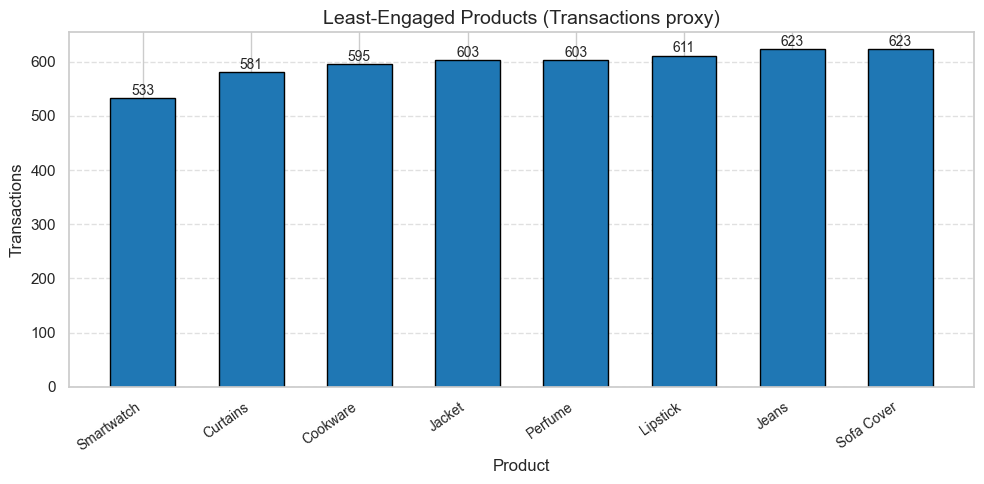

In [64]:
#Visualization-- Transactions for least products
#  bar chart: Transactions for least products
plt.figure(figsize=(10,5))
bars = plt.bar(least.index.astype(str), least["Transactions"].values, color="#1f77b4", edgecolor="black", width=0.6)
plt.title("Least-Engaged Products (Transactions proxy)", fontsize=14)
plt.ylabel("Transactions", fontsize=12)
plt.xlabel("Product", fontsize=12)
plt.xticks(rotation=35, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)
# annotate bar values
for b in bars:
    plt.text(b.get_x() + b.get_width()/2, b.get_height()+0.5, int(b.get_height()), ha="center", va="bottom", fontsize=10)
plt.tight_layout()
plt.show()





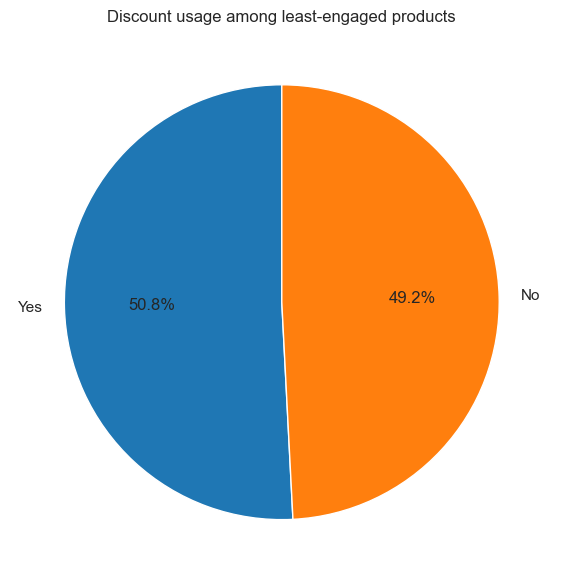

In [65]:
#  Pie chart: Discount split among least products (blue & orange)
least_df = df[df[PROD_COL].isin(least_products)]
disc_counts = least_df["Discount_Applied"].value_counts().reindex(["Yes","No"]).fillna(0)
plt.figure(figsize=(6,6))
colors = ["#1f77b4", "#ff7f0e"]  # Blue = Yes, Orange = No (or flip as desired)
plt.pie(disc_counts.values, labels=disc_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Discount usage among least-engaged products")
plt.tight_layout()
plt.show()

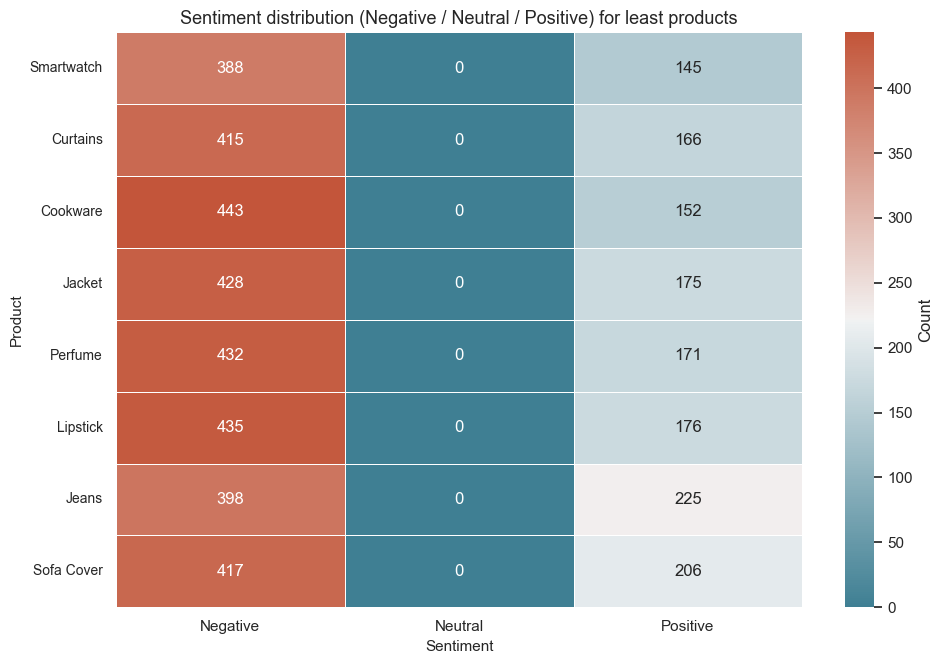

In [66]:
#  Heatmap: Sentiment counts for least products (blue↔orange colormap)
plt.figure(figsize=(10, 0.6*len(least_products)+2))
sns.set(style="whitegrid")
heat = sent_ct.loc[least_products]  # keep the same order
# Use a diverging palette and normalize
sns.heatmap(
    heat,
    annot=True,
    fmt="d",
    linewidths=0.6,
    linecolor="white",
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    cbar_kws={"label": "Count"}
)
plt.title("Sentiment distribution (Negative / Neutral / Positive) for least products", fontsize=13)
plt.xlabel("Sentiment", fontsize=11)
plt.ylabel("Product", fontsize=11)
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [67]:
# show short printed output
print("\nLeast-engaged products (Transactions & Revenue):")
print(least)

print("\nCampaign plan (first rows):")
print(campaign_df[["Product","Transactions","Negative","Neutral","Positive","Plan"]].head())

# files written:
# - product_summary_all.csv (all products transactions & revenue)
# - least_products_summary.csv (least N products)
# - campaign_plan_least_products.csv (plans)
summary.to_csv("product_summary_all.csv", index=True)
least.to_csv("least_products_summary.csv", index=True)



Least-engaged products (Transactions & Revenue):
              Transactions    Revenue
Product_Name                         
Smartwatch             533  143310.29
Curtains               581  152192.40
Cookware               595  165428.88
Jacket                 603  158144.38
Perfume                603  158211.83
Lipstick               611  166087.56
Jeans                  623  162451.11
Sofa Cover             623  173192.68

Campaign plan (first rows):
      Product  Transactions  Negative  Neutral  Positive  \
0  Smartwatch           533       388        0       145   
1    Curtains           581       415        0       166   
2    Cookware           595       443        0       152   
3      Jacket           603       428        0       175   
4     Perfume           603       432        0       171   

                                                Plan  
0  Quality & service improvements: investigate ne...  
1  Quality & service improvements: investigate ne...  
2  Quality & se